In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
digits.target.shape

(1797,)

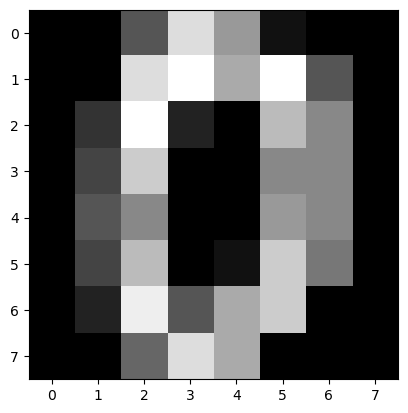

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8) , cmap='gray')

- 9이면 1, 0~8 이면 0 으로 분류하는 문제 (multi-class -> binary classification)

In [4]:
y = (digits.target == 9).astype(int)
set(y)

{0, 1}

In [6]:
X_train , X_test , y_train, y_test = train_test_split(digits.data , y , random_state=0,test_size=0.25)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

 - 모델 1 : Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       403
           1       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 모델 2 Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train , y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       403
           1       1.00      0.72      0.84        47

    accuracy                           0.97       450
   macro avg       0.98      0.86      0.91       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
logreg.predict_proba(X_test)[:,1] > 0

In [10]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresholds = precision_recall_curve(y_test , logreg.predict_proba(X_test)[:,1])


Text(0, 0.5, 'recall')

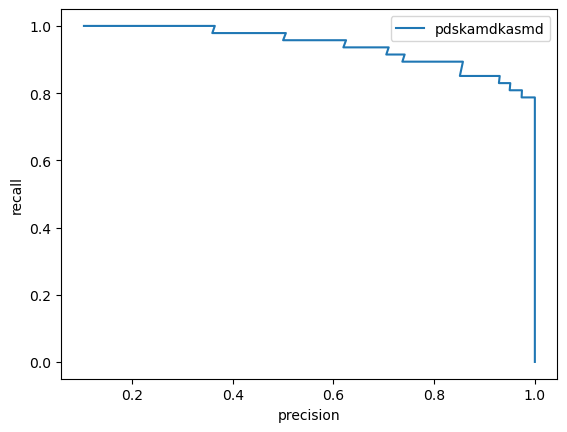

In [11]:
plt.plot(precision, recall ,label = 'pdskamdkasmd')
plt.legend()
plt.xlabel('precision')
plt.ylabel('recall')

Text(0, 0.5, 'recall')

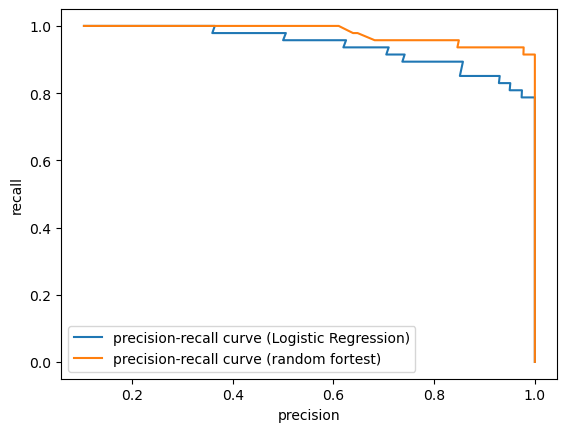

In [13]:
plt.plot(precision, recall, label='precision-recall curve (Logistic Regression)')
precision_rf , recall_rf , thresholds_rf = precision_recall_curve(y_test , rf.predict_proba(X_test)[:,1])
plt.plot(precision_rf , recall_rf , label = 'precision-recall curve (random fortest)')

plt.legend()
plt.xlabel('precision')
plt.ylabel('recall')

In [15]:
print(classification_report(y_test, rf.predict_proba(X_test)[:,1] > 0.4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       403
           1       1.00      0.83      0.91        47

    accuracy                           0.98       450
   macro avg       0.99      0.91      0.95       450
weighted avg       0.98      0.98      0.98       450



 - ROC 와 AOC 

In [16]:
from sklearn.metrics import roc_curve , roc_auc_score

Text(0, 0.5, 'TPR (True Positive Rate)')

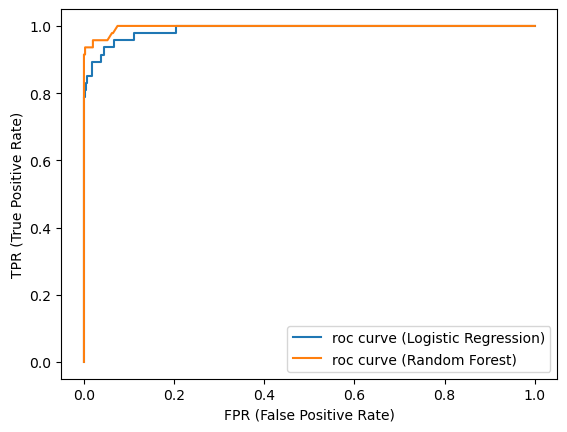

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='roc curve (Logistic Regression)')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='roc curve (Random Forest)')

plt.legend()
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')